In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from finance_byu.summarize import summary

In [135]:
# Rebalance every year (January)
# Form portfolios using last year of data.
# Hold portfolios for one year.

In [136]:
df = pd.read_parquet("~/Data/BOQ_data.parquet")

df.tail()

,A2ME,BEME,BEME_adj,BEME_ind,CEI,DATE,DEC_ME,DEC_SHROUT,Div,Div_ann,...,s2invt,s2rect,sale,sale_ind,sales_g,sga2s,spread_mean,std_turn,std_vol,suv
0,NaN,NaN,NaN,0.824752,NaN,1986-01-31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,0.825905,NaN,1986-02-28,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.076998,0.212080,7.804561e+03,NaN
2,NaN,NaN,NaN,0.825905,NaN,1986-03-31,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.055511,0.107977,3.973568e+03,-0.363314
3,NaN,NaN,NaN,0.825015,NaN,1986-04-30,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.037231,0.174533,6.422826e+03,-0.571056
4,NaN,NaN,NaN,0.824672,NaN,1986-05-31,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.048336,0.150228,5.527503e+03,-0.708679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3568650,0.211263,0.114912,-0.746238,0.861151,-12.189408,2023-08-31,3.897415e+08,3164000.0,0.0,0.0,...,6.344887,26.084534,81462.0,579615.973,0.513517,0.086187,0.000152,0.708916,2.250092e+07,-1.580970
3568651,0.211263,0.114912,-0.750723,0.865635,-11.613183,2023-09-30,3.897415e+08,3164000.0,0.0,0.0,...,6.344887,26.084534,81462.0,579615.973,0.513517,0.086187,0.000133,0.465122,1.476294e+07,-0.371920
3568652,0.211263,0.114912,-0.731231,0.846143,-12.752123,2023-10-31,3.897415e+08,3164000.0,0.0,0.0,...,6.344887,26.084534,81462.0,579615.973,0.513517,0.086187,0.000177,0.531342,1.686876e+07,0.809301
3568653,0.211263,0.114912,-0.731231,0.846143,-7.943286,2023-11-30,3.897415e+08,3164000.0,0.0,0.0,...,6.344887,26.084534,81462.0,579615.973,0.513517,0.086187,0.000245,0.614813,1.954419e+07,0.278301


In [137]:
# Create initial dataframe. Keep only necessary columns, and generate date variables

keep = ['DATE', 'PERMNO', 'BEME', 'E2P', 'sale', 'ME', 'PRC', 'RET', ]

df = df[keep]

df = df.rename(columns={'DATE':'caldt','PERMNO':'permno','BEME':'beme', 'E2P': 'ep', 'sale': 'sales', 'ME': 'me', 'PRC':'prc', 'RET': 'ret'})

df = df.sort_values(['permno','caldt'])

df['mdt'] = df['caldt'].dt.strftime("%Y-%m")
df['month'] = df['caldt'].dt.strftime("%m")
df['year'] = df['caldt'].dt.strftime("%Y")

# df = df[df['caldt'] >= '2000-01-01']

df = df.reset_index(drop=True)

df.tail()

,caldt,permno,beme,ep,sales,me,prc,ret,mdt,month,year
0,1986-01-31,10000.0,NaN,NaN,NaN,1.610000e+04,4.375000,NaN,1986-01,01,1986
1,1986-02-28,10000.0,NaN,NaN,NaN,1.196000e+04,3.250000,-0.257143,1986-02,02,1986
2,1986-03-31,10000.0,NaN,NaN,NaN,1.633000e+04,4.437500,0.365385,1986-03,03,1986
3,1986-04-30,10000.0,NaN,NaN,NaN,1.517200e+04,4.000000,-0.098592,1986-04,04,1986
4,1986-05-31,10000.0,NaN,NaN,NaN,1.179386e+04,3.109375,-0.222656,1986-05,05,1986
...,...,...,...,...,...,...,...,...,...,...,...
3534200,2023-08-31,93436.0,0.114912,0.032216,81462.0,8.191443e+08,258.079987,-0.034962,2023-08,08,2023
3534201,2023-09-30,93436.0,0.114912,0.032216,81462.0,7.954494e+08,250.220001,-0.030456,2023-09,09,2023
3534202,2023-10-31,93436.0,0.114912,0.032216,81462.0,6.384545e+08,200.839996,-0.197346,2023-10,10,2023
3534203,2023-11-30,93436.0,0.114912,0.032216,81462.0,7.631954e+08,240.080002,0.195379,2023-11,11,2023


In [138]:
# Generate features from the last 12 months

look_back = 12 # months

# 1 month sales growth
df['sg'] = df.groupby("permno")['sales'].pct_change(fill_method=None)

# Log 1 months sales growth
df['log_sg'] = np.log(1+df['sg'])

# Past 1 year log sales growth
df[f'log_sg_{look_back}'] = df.groupby('permno').rolling(look_back,look_back)['log_sg'].sum().reset_index(drop=True)

df.tail()

/Users/andrew/Projects/Quant/mean_reversion/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/andrew/Projects/Quant/mean_reversion/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,caldt,permno,beme,ep,sales,me,prc,ret,mdt,month,year,sg,log_sg,log_sg_12
0,1986-01-31,10000.0,NaN,NaN,NaN,1.610000e+04,4.375000,NaN,1986-01,01,1986,NaN,NaN,NaN
1,1986-02-28,10000.0,NaN,NaN,NaN,1.196000e+04,3.250000,-0.257143,1986-02,02,1986,NaN,NaN,NaN
2,1986-03-31,10000.0,NaN,NaN,NaN,1.633000e+04,4.437500,0.365385,1986-03,03,1986,NaN,NaN,NaN
3,1986-04-30,10000.0,NaN,NaN,NaN,1.517200e+04,4.000000,-0.098592,1986-04,04,1986,NaN,NaN,NaN
4,1986-05-31,10000.0,NaN,NaN,NaN,1.179386e+04,3.109375,-0.222656,1986-05,05,1986,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534200,2023-08-31,93436.0,0.114912,0.032216,81462.0,8.191443e+08,258.079987,-0.034962,2023-08,08,2023,0.0,0.0,0.414436
3534201,2023-09-30,93436.0,0.114912,0.032216,81462.0,7.954494e+08,250.220001,-0.030456,2023-09,09,2023,0.0,0.0,0.414436
3534202,2023-10-31,93436.0,0.114912,0.032216,81462.0,6.384545e+08,200.839996,-0.197346,2023-10,10,2023,0.0,0.0,0.414436
3534203,2023-11-30,93436.0,0.114912,0.032216,81462.0,7.631954e+08,240.080002,0.195379,2023-11,11,2023,0.0,0.0,0.414436


In [139]:
# Generate target variable

# Log 1 month return
df['log_ret'] = np.log(1 + df['ret'])

holding_period = 12 # months

# 12 month holding period return
df[f'ret_{holding_period}'] = df.groupby('permno').rolling(holding_period,holding_period)['log_ret'].sum().reset_index(drop=True)
df[f'ret_{holding_period}'] = df.groupby('permno')[f'ret_{holding_period}'].shift(-(holding_period-1))

df.tail()

,caldt,permno,beme,ep,sales,me,prc,ret,mdt,month,year,sg,log_sg,log_sg_12,log_ret,ret_12
0,1986-01-31,10000.0,NaN,NaN,NaN,1.610000e+04,4.375000,NaN,1986-01,01,1986,NaN,NaN,NaN,NaN,NaN
1,1986-02-28,10000.0,NaN,NaN,NaN,1.196000e+04,3.250000,-0.257143,1986-02,02,1986,NaN,NaN,NaN,-0.297252,-2.376693
2,1986-03-31,10000.0,NaN,NaN,NaN,1.633000e+04,4.437500,0.365385,1986-03,03,1986,NaN,NaN,NaN,0.311436,-2.079442
3,1986-04-30,10000.0,NaN,NaN,NaN,1.517200e+04,4.000000,-0.098592,1986-04,04,1986,NaN,NaN,NaN,-0.103797,-2.876386
4,1986-05-31,10000.0,NaN,NaN,NaN,1.179386e+04,3.109375,-0.222656,1986-05,05,1986,NaN,NaN,NaN,-0.251873,-2.837127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534200,2023-08-31,93436.0,0.114912,0.032216,81462.0,8.191443e+08,258.079987,-0.034962,2023-08,08,2023,0.0,0.0,0.414436,-0.035588,NaN
3534201,2023-09-30,93436.0,0.114912,0.032216,81462.0,7.954494e+08,250.220001,-0.030456,2023-09,09,2023,0.0,0.0,0.414436,-0.030929,NaN
3534202,2023-10-31,93436.0,0.114912,0.032216,81462.0,6.384545e+08,200.839996,-0.197346,2023-10,10,2023,0.0,0.0,0.414436,-0.219832,NaN
3534203,2023-11-30,93436.0,0.114912,0.032216,81462.0,7.631954e+08,240.080002,0.195379,2023-11,11,2023,0.0,0.0,0.414436,0.178464,NaN


In [140]:
# Lag all formation variables by 1 month
df['beme_lag'] = df.groupby('permno')['beme'].shift(1)
df['ep_lag'] = df.groupby('permno')['ep'].shift(1) 
df['sg_lag'] = df.groupby('permno')[f'log_sg_{look_back}'].shift(1)
df['prc_lag'] = df.groupby('permno')['prc'].shift(1)

# Remove stocks that don't have formation variables and low priced stocks
df = df.query("beme_lag == beme_lag and ep_lag == ep_lag and sg_lag == sg_lag and prc_lag >= 5").reset_index(drop=True)

df.tail()

,caldt,permno,beme,ep,sales,me,prc,ret,mdt,month,year,sg,log_sg,log_sg_12,log_ret,ret_12,beme_lag,ep_lag,sg_lag,prc_lag
0,1988-08-31,10001.0,1.207618,0.053535,16.621,6.572000e+03,6.625000,0.029126,1988-08,08,1988,0.0,0.0,-0.255524,0.028710,0.187696,1.207618,0.053535,-0.255524,6.437500
1,1988-09-30,10001.0,1.207618,0.053535,16.621,6.362250e+03,6.375000,-0.021132,1988-09,09,1988,0.0,0.0,-0.255524,-0.021359,0.402608,1.207618,0.053535,-0.255524,6.625000
2,1988-10-31,10001.0,1.207618,0.053535,16.621,6.611750e+03,6.625000,0.039216,1988-10,10,1988,0.0,0.0,-0.255524,0.038466,0.396567,1.207618,0.053535,-0.255524,6.375000
3,1988-11-30,10001.0,1.207618,0.053535,16.621,6.611750e+03,6.625000,0.000000,1988-11,11,1988,0.0,0.0,-0.255524,0.000000,0.426155,1.207618,0.053535,-0.255524,6.625000
4,1988-12-31,10001.0,1.207618,0.053535,16.621,6.362250e+03,6.375000,-0.021132,1988-12,12,1988,0.0,0.0,-0.255524,-0.021359,0.464869,1.207618,0.053535,-0.255524,6.625000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1933809,2023-08-31,93436.0,0.114912,0.032216,81462.000,8.191443e+08,258.079987,-0.034962,2023-08,08,2023,0.0,0.0,0.414436,-0.035588,NaN,0.114912,0.032216,0.414436,267.429993
1933810,2023-09-30,93436.0,0.114912,0.032216,81462.000,7.954494e+08,250.220001,-0.030456,2023-09,09,2023,0.0,0.0,0.414436,-0.030929,NaN,0.114912,0.032216,0.414436,258.079987
1933811,2023-10-31,93436.0,0.114912,0.032216,81462.000,6.384545e+08,200.839996,-0.197346,2023-10,10,2023,0.0,0.0,0.414436,-0.219832,NaN,0.114912,0.032216,0.414436,250.220001
1933812,2023-11-30,93436.0,0.114912,0.032216,81462.000,7.631954e+08,240.080002,0.195379,2023-11,11,2023,0.0,0.0,0.414436,0.178464,NaN,0.114912,0.032216,0.414436,200.839996


In [141]:
# Create quantiles based off of b/m lag and sales growth lag
df['beme_bins'] = df.groupby("mdt")['beme_lag'].transform(lambda x: pd.qcut(x, 3, labels=False))
df['sg_bins'] = df.groupby("mdt")['sg_lag'].transform(lambda x: pd.qcut(x, 3, labels=False))

df.tail()

,caldt,permno,beme,ep,sales,me,prc,ret,mdt,month,...,log_sg,log_sg_12,log_ret,ret_12,beme_lag,ep_lag,sg_lag,prc_lag,beme_bins,sg_bins
0,1988-08-31,10001.0,1.207618,0.053535,16.621,6.572000e+03,6.625000,0.029126,1988-08,08,...,0.0,-0.255524,0.028710,0.187696,1.207618,0.053535,-0.255524,6.437500,2,0
1,1988-09-30,10001.0,1.207618,0.053535,16.621,6.362250e+03,6.375000,-0.021132,1988-09,09,...,0.0,-0.255524,-0.021359,0.402608,1.207618,0.053535,-0.255524,6.625000,2,0
2,1988-10-31,10001.0,1.207618,0.053535,16.621,6.611750e+03,6.625000,0.039216,1988-10,10,...,0.0,-0.255524,0.038466,0.396567,1.207618,0.053535,-0.255524,6.375000,2,0
3,1988-11-30,10001.0,1.207618,0.053535,16.621,6.611750e+03,6.625000,0.000000,1988-11,11,...,0.0,-0.255524,0.000000,0.426155,1.207618,0.053535,-0.255524,6.625000,2,0
4,1988-12-31,10001.0,1.207618,0.053535,16.621,6.362250e+03,6.375000,-0.021132,1988-12,12,...,0.0,-0.255524,-0.021359,0.464869,1.207618,0.053535,-0.255524,6.625000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1933809,2023-08-31,93436.0,0.114912,0.032216,81462.000,8.191443e+08,258.079987,-0.034962,2023-08,08,...,0.0,0.414436,-0.035588,NaN,0.114912,0.032216,0.414436,267.429993,0,2
1933810,2023-09-30,93436.0,0.114912,0.032216,81462.000,7.954494e+08,250.220001,-0.030456,2023-09,09,...,0.0,0.414436,-0.030929,NaN,0.114912,0.032216,0.414436,258.079987,0,2
1933811,2023-10-31,93436.0,0.114912,0.032216,81462.000,6.384545e+08,200.839996,-0.197346,2023-10,10,...,0.0,0.414436,-0.219832,NaN,0.114912,0.032216,0.414436,250.220001,0,2
1933812,2023-11-30,93436.0,0.114912,0.032216,81462.000,7.631954e+08,240.080002,0.195379,2023-11,11,...,0.0,0.414436,0.178464,NaN,0.114912,0.032216,0.414436,200.839996,0,2


In [142]:
# Create portfolio dataframe with only january month data
port = df[df['month'] == '01'].copy()

# Group stocks by year and bins
port = port.groupby(['year', 'beme_bins', 'sg_bins'])[f'ret_{holding_period}'].mean().unstack(level=['beme_bins', 'sg_bins'])

# Drop rows with no holding period returns
port = port.dropna()

# Value portfolio is high b/m and low sg
# Glamor portfolio is low b/m and high sg
# Create a spread portfolio with long value and short glamor stocks
port['spread'] = port[2][0] - port[0][2]

port.tail()

beme_bins         0                             1                      \
sg_bins           0         1         2         0         1         2   
year                                                                    
1958       0.390049  0.375978  0.392466  0.406004  0.442159  0.427528   
1959       0.160950  0.148106  0.026931  0.160231  0.116660  0.258324   
1960      -0.084205  0.015125  0.094083 -0.165616 -0.033257  0.040226   
1961       0.234079  0.208284  0.155493  0.253512  0.209082  0.240982   
1962      -0.162499 -0.131794 -0.243626 -0.192978 -0.156166 -0.232242   
...             ...       ...       ...       ...       ...       ...   
2019       0.149080  0.235617  0.198530  0.125722  0.190631  0.164660   
2020       0.175807  0.181202  0.329058  0.013420  0.009003 -0.027363   
2021       0.056399  0.154858 -0.099148  0.195464  0.170540  0.088332   
2022      -0.474566 -0.337910 -0.548848 -0.210178 -0.184508 -0.337928   
2023       0.016170  0.139405  0.079783 -0.002105  0.078431  0.119505   

beme_bins         2                        spread  
sg_bins           0         1         2            
year                                               
1958       0.485883  0.477366  0.453523  0.093416  
1959       0.188966  0.172846  0.122750  0.162035  
1960      -0.156858 -0.060365  0.065819 -0.250942  
1961       0.295474  0.295309  0.236381  0.139981  
1962      -0.124900 -0.163190 -0.062585  0.118726  
...             ...       ...       ...       ...  
2019       0.078249  0.167692  0.084939 -0.120281  
2020      -0.059035 -0.059084 -0.131108 -0.388093  
2021       0.216964  0.264182  0.261746  0.316111  
2022      -0.082411 -0.114664 -0.160708  0.466437  
2023       0.029206  0.037902  0.019670 -0.050577  

[66 rows x 10 columns]

In [143]:
# Portfolio summary table

(summary(port).loc[['count','mean','std','tstat']] * 100).round(3)

beme_bins         0                             1                      \
sg_bins           0         1         2         0         1         2   
count      6600.000  6600.000  6600.000  6600.000  6600.000  6600.000   
mean         -0.477     5.181    -2.549     5.205     7.440     2.996   
std          23.623    19.142    27.222    20.209    18.841    24.179   
tstat       -16.389   219.883   -76.058   209.238   320.816   100.665   

beme_bins         2                        spread  
sg_bins           0         1         2            
count      6600.000  6600.000  6600.000  6600.000  
mean          7.938     9.436     6.511    10.487  
std          22.075    20.788    23.900    17.756  
tstat       292.128   368.762   221.316   479.792

In [149]:
# Create backtest with yearly returns

backtest_y = port.copy()
backtest_y.index = pd.to_datetime(backtest_y.index)
backtest_y['cum_ret'] = backtest_y['spread'].cumsum()

backtest_y.tail()

beme_bins          0                             1                      \
sg_bins            0         1         2         0         1         2   
year                                                                     
1958-01-01  0.390049  0.375978  0.392466  0.406004  0.442159  0.427528   
1959-01-01  0.160950  0.148106  0.026931  0.160231  0.116660  0.258324   
1960-01-01 -0.084205  0.015125  0.094083 -0.165616 -0.033257  0.040226   
1961-01-01  0.234079  0.208284  0.155493  0.253512  0.209082  0.240982   
1962-01-01 -0.162499 -0.131794 -0.243626 -0.192978 -0.156166 -0.232242   
...              ...       ...       ...       ...       ...       ...   
2019-01-01  0.149080  0.235617  0.198530  0.125722  0.190631  0.164660   
2020-01-01  0.175807  0.181202  0.329058  0.013420  0.009003 -0.027363   
2021-01-01  0.056399  0.154858 -0.099148  0.195464  0.170540  0.088332   
2022-01-01 -0.474566 -0.337910 -0.548848 -0.210178 -0.184508 -0.337928   
2023-01-01  0.016170  0.139405  0.079783 -0.002105  0.078431  0.119505   

beme_bins          2                        spread   cum_ret  
sg_bins            0         1         2                      
year                                                          
1958-01-01  0.485883  0.477366  0.453523  0.093416  0.093416  
1959-01-01  0.188966  0.172846  0.122750  0.162035  0.255451  
1960-01-01 -0.156858 -0.060365  0.065819 -0.250942  0.004509  
1961-01-01  0.295474  0.295309  0.236381  0.139981  0.144490  
1962-01-01 -0.124900 -0.163190 -0.062585  0.118726  0.263217  
...              ...       ...       ...       ...       ...  
2019-01-01  0.078249  0.167692  0.084939 -0.120281  6.577233  
2020-01-01 -0.059035 -0.059084 -0.131108 -0.388093  6.189139  
2021-01-01  0.216964  0.264182  0.261746  0.316111  6.505251  
2022-01-01 -0.082411 -0.114664 -0.160708  0.466437  6.971688  
2023-01-01  0.029206  0.037902  0.019670 -0.050577  6.921111  

[66 rows x 11 columns]

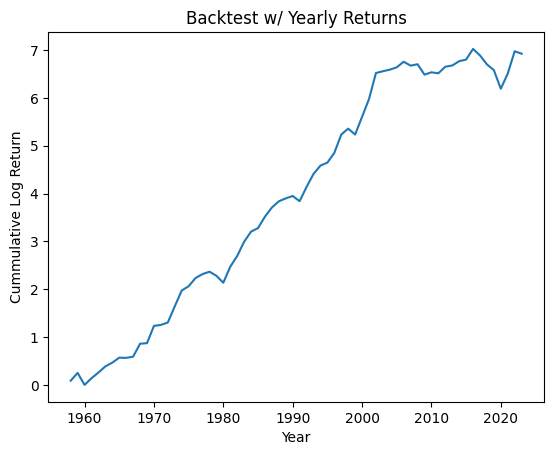

In [159]:
plt.plot(backtest_y.index,backtest_y['cum_ret'])
plt.title("Backtest w/ Yearly Returns")
plt.xlabel("Year")
plt.ylabel("Cummulative Log Return")
plt.show()

In [147]:
# Create backtest with monthly returns

backtest_m = df.groupby(['mdt','beme_bins','sg_bins'])['ret'].mean().unstack(level=['beme_bins','sg_bins'])

backtest_m['spread'] = backtest_m[2][0] - backtest_m[0][2]

backtest_m = backtest_m.dropna()

backtest_m = backtest_m['spread'].reset_index()

backtest_m['cum_ret'] = backtest_m['spread'].cumsum()

backtest_m['mdt'] = pd.to_datetime(backtest_m['mdt'])

backtest_m

,mdt,spread,cum_ret
0,1957-08-01,0.040745,0.040745
1,1957-09-01,0.027674,0.068419
2,1957-10-01,-0.005840,0.062579
3,1957-11-01,-0.044000,0.018579
4,1957-12-01,0.010100,0.028680
...,...,...,...
792,2023-08-01,0.025808,4.082855
793,2023-09-01,0.019980,4.102836
794,2023-10-01,0.038226,4.141062
795,2023-11-01,-0.039431,4.101631


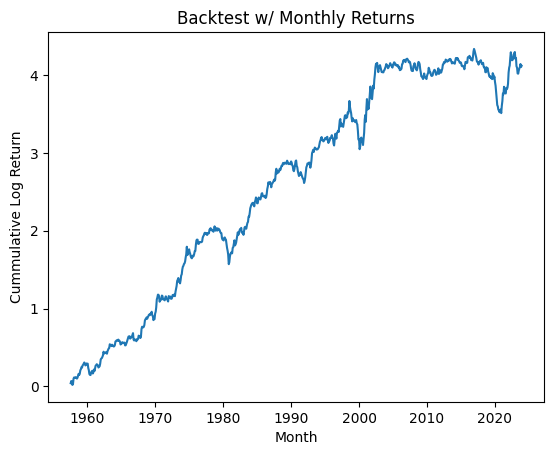

In [160]:
plt.plot(backtest_m['mdt'], backtest_m['cum_ret'])
plt.title("Backtest w/ Monthly Returns")
plt.xlabel("Month")
plt.ylabel("Cummulative Log Return")
plt.show()

In [157]:
# Calculate sharpe ratio using monthly returns

numerator = backtest_m['spread'].mean()
denominator = backtest_m['spread'].std()
scale = 12 / np.sqrt(12)

sharpe = numerator / denominator * scale

print(f"Sharpe Ratio of {round(sharpe,2)}")

Sharpe Ratio of 0.48
